In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import time

import models

In [2]:
# load the data. It may take a while
data = sio.loadmat("./data/data_120_10000.mat")

In [3]:
lamb = data["lamb"]
sols = data["sols"]
fs = data["fs"]
xx = data["xx"]
yy = data["yy"]
xi = data["xi"]

N = 10000
u_ref = sols[:N, ...]
f_ref = fs[:N, ...]
x_train = xx[::2, ::2].reshape([-1, 1])
y_train = yy[::2, ::2].reshape([-1, 1])
f_train = f_ref[:, ::2, ::2].reshape([N, -1])
f_train = f_train.T

In [ ]:
mhpinn = models.MHPINN(
    num_tasks=N, dim=100, name="mhpinn2",
)

In [5]:
t0 = time.time()
loss = mhpinn.train(x_train, y_train, f_train, niter=50000, ftol=1e-6)
t1 = time.time()

0 0.0740705 , time:  4.205596208572388
1000 0.022103164 , time:  676.4040007591248


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\zouzo\anaconda3\envs\tf2\lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\zouzo\AppData\Local\Temp\ipykernel_18328\1205372947.py", line 2, in <module>
    loss = mhpinn.train(x_train, y_train, f_train, niter=50000, ftol=1e-6)
  File "C:\Users\zouzo\Desktop\MHPINN\example_6_2\case_1_v2\models.py", line 83, in train
    loss_value = train_op(x_train, y_train, f_train)
  File "C:\Users\zouzo\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "C:\Users\zouzo\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\eager\def_function.py", line 915, in __call__
    result = self._call(*args, **kwds)
  File "C:\Users\zouzo\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\eager\def_function.py", line 947, in _call
    return self._stateless_fn(*args


KeyboardInterrupt



In [7]:
mhpinn.restore()
xx = data["xx"].reshape([-1, 1])
yy = data["yy"].reshape([-1, 1])
xx_test = tf.constant(xx, tf.float32)
yy_test = tf.constant(yy, tf.float32)
u_pred = mhpinn.call(xx_test, yy_test, mhpinn.heads).numpy()
u_pred = u_pred.reshape([101, 101, N])
u_pred = np.transpose(u_pred, [2, 0, 1])

f_pred = mhpinn.pde(xx_test, yy_test, mhpinn.heads).numpy()
f_pred = f_pred.reshape([101, 101, N])
f_pred = np.transpose(f_pred, [2, 0, 1])

In [8]:
L2 = np.sqrt(np.sum(np.sum((u_ref - u_pred)**2, axis=-1), axis=-1) / np.sum(np.sum(u_ref**2, axis=-1), axis=-1))

In [9]:
np.mean(L2), np.std(L2)

(0.028285414066786096, 0.006672750864576338)

In [12]:
np.mean(L2), np.std(L2)

(0.020970933649045242, 0.012005247635838845)

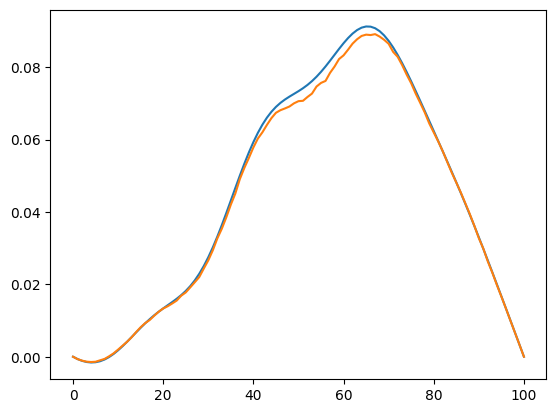

In [12]:
k = 30
j = 45
plt.plot(u_ref[k, :, j])
plt.plot(u_pred[k, :, j])

#### Training

In [ ]:
t0 = time.time()
loss = mhpinn.train(x_train, y_train, f_train, niter=50000, ftol=1e-6)
t1 = time.time()

0 0.00041057245 , time:  0.4253392219543457
1000 0.0003972619 , time:  46.97417855262756
2000 0.0004072902 , time:  46.805591344833374
3000 0.00037679114 , time:  46.608054399490356
4000 0.00037312508 , time:  46.87186813354492
5000 0.00038321075 , time:  46.50478553771973
6000 0.0003741197 , time:  46.8447380065918
7000 0.00036768604 , time:  46.35226583480835
8000 0.0003613669 , time:  46.28135323524475
9000 0.00037765582 , time:  46.82025933265686
10000 0.00036266915 , time:  46.749337911605835
11000 0.0003496921 , time:  46.51775884628296
12000 0.00034777354 , time:  47.21921372413635
13000 0.00035100832 , time:  46.28081393241882
14000 0.00040153036 , time:  46.368913412094116
15000 0.00036689188 , time:  46.609062910079956
16000 0.0003351327 , time:  46.7080717086792
17000 0.00036048103 , time:  46.467071533203125
18000 0.0003347958 , time:  46.66883993148804
19000 0.000347742 , time:  46.250826835632324
20000 0.0003373649 , time:  46.51789903640747
21000 0.0003344114 , time:  46